In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/Users/varso/MODULO5.0/Data/titanic_preprocesamiento.csv')
df.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0


# Clasificación Binaria

In [3]:
# 0 = No Sobrevivió
# 1 = Sí Sobrevivió
X = df.drop('Survived', axis=1)
X.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0


In [4]:
y = df['Survived']
df

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.000000,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.000000,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.000000,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.000000,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.000000,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,39.000000,3.0,5.0,0.0,0.0,1.0,0.0,3.405355,0.0,0.0,1.0,0.0
872,27.000000,2.0,1.0,0.0,0.0,0.0,1.0,2.639057,0.0,0.0,1.0,0.0
873,19.000000,1.0,1.0,1.0,2.0,1.0,0.0,3.433987,0.0,0.0,1.0,1.0
874,19.666667,3.0,2.0,0.0,0.0,1.0,0.0,3.196630,1.0,0.0,0.0,0.0


In [5]:
y = df['Survived'] # Tenemos un desbalance en los datos hay más de uno que de otros | para que esten balanceados deberían ser iguales
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
871    0.0
872    0.0
873    1.0
874    0.0
875    1.0
Name: Survived, Length: 876, dtype: float64

# Regresión logística 
* Parte lineal: similar a regresión lineal. Combina linealmente las columnas del dataframe

In [6]:
X.shape

(876, 11)

In [7]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
871    0.0
872    0.0
873    1.0
874    0.0
875    1.0
Name: Survived, Length: 876, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay  # accuracy es para la precisión

# LogisticRegression es un algoritmo de clasificación
# https://the-algorithms.com/es/algorithm/logistic-regression

# 1º Particionamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500, C=0.5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))


 
 

[[99 16]
 [13 48]]


## Matriz de confusión

Convención práctica (scikit learn)

|                   | **Predicho: 0** | **Predicho: 1** |
|-------------------|-----------------|-----------------|
| **Real: 0**       | 98 (TN)         | 17 (FP)         |
| **Real: 1**       | 13 (FN)          | 48 (TP)         |

Convención teórica

|                   | **Predicho: 1** | **Predicho: 0** |
|-------------------|-----------------|-----------------|
| **Real: 1**       | **True Positive (TP)** | **False Negative (FN)** |
| **Real: 0**       | **False Positive (FP)** | **True Negative (TN)** |

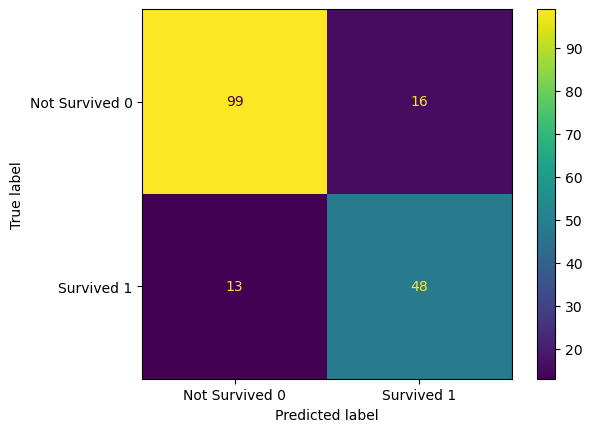

In [9]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not Survived 0','Survived 1']) # Not los que no sebreviven o 0 , y 1 los que sobreviven

cmd.plot();
# Esto nos dice que 98 personas no han sobrevido por lo tanto acertado, igual que dice el modelo real

# Métricas todas de golpe

* TP,VP: Esto es True Positive o verdadero positivo 98 personas no sobrevivieron, y el modelo predice que no sebrevivieron (ES CORRECTO)

* Observamos que la clase 1 (Survived) el modelo tiene peores puntuaciones 0,76 - 61 hay menos de la clase1 que de la clase 0
* support indica el número de registro de las filas, HAY QUE TENER EN CUENTA QUE SE HA HECHO EL PARTICIONAMIENTO SOLO DEL 20% POR ESO NOS DA 115 TOTAL NOT SURVIVED DE LOS 535
* Esto es causa del desbalance porque tiene menos datos en los Survived que los Not Survived
* Podemos verlo en el Notebook_Teoria 0.7 metricas_clasificatorias 

In [10]:
from sklearn.metrics import classification_report  # esto nos dice lo bien que procesa nuestro clasificador 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       115
         1.0       0.75      0.79      0.77        61

    accuracy                           0.84       176
   macro avg       0.82      0.82      0.82       176
weighted avg       0.84      0.84      0.84       176



## Principales Métricas

## Accuracy

   * Exactitud: porcentaje de muestras que el modelo clasifica correctamente (TN,TP)
   * accuracy= número de aciertos/número total de muestras

In [11]:
# Exactitud,  ratio de acierto

print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8352272727272727


# Precision
   * Precisión: De todas las observaciones que el modelo predijo como positivos, ¿Cuántos son realmente positivos?
   * Precisión: TP/TP + FP
   Enfocada en evitar falsos positivos (FP).

Responde: "De los casos que predije como positivos, ¿qué proporción eran realmente positivos?"

Útil cuando los falsos positivos son costosos, como en detección de spam (es preferible no marcar un correo legítimo como spam).



In [12]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.75

# Recall

   * Recall o sensibilidad: TP/TP +FN
   * Responde:  De los casos positivos 
   * Responde: "De los casos positivos reales, ¿qué proporción detecté correctamente?"

* Útil cuando los falsos negativos son costosos, como en detección de enfermedades (es mejor detectar todos los enfermos, incluso si algunos falsos positivos ocurren).

In [13]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7868852459016393

# f1_score

   * Es una media de Precision y recall , tiene en cuenta ambas métricas, proporciona un balance entre ambas
   * Es la métrica más confiable para Data sets desbalanceados

In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.768

# ROC_AUC

* Curva ilustrar el rendimiento del clasificador en distintos umbrales de decisión:
    * TPR: True Positive ratio
    * FDR: False Positive ratio

* TPR = 1, FDR = 0, esto sería lo ideal el valor 1 perfecto, el valor 0 en los falsos

* AUC: Area Under the curve:
    * AUC= 1 Perfecto
    * AUC= 0.5 malo,  igual que tomar una decisión aleatoria
    * AUC < 0.5 peor que aleatorio, posible problema en el modelo

In [15]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f'AUC {auc}')

AUC 0.8238774055595153


# Gráfico que muestra que tan bien el modelo diferencia entre las clases
 * Eje x: FPR tasa de falsos positivos
 * Eje y: FPR tasa de verdaderos positivos
 * Nos interesa que la diagonal este en 0.0 y vaya a 1.1 lo más recto posible con la curva a rriba 
 * FPR si es 0 es ideal 
 * TPR es 1 es ideal
 * Interpretación: Cuánto más de la esquina superior izquierda MEJOR más cerca de 1

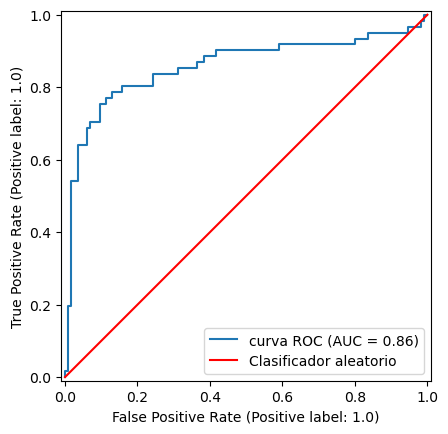

In [16]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(model, X_test, y_test, name='curva ROC')
plt.plot([0, 1],[0,1], label='Clasificador aleatorio',color='red')
plt.legend()

* Hacer predict sobre un pasajero ficticio y saber a clase pertenece

In [17]:
model.predict(X_test) # Aquí vemos los 1 sobreviven y 0 no sobreviven

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [18]:
model.predict_proba(X_test) # Esto nos da la probabilidad nos dice que tiene un 30% de que no haya sobrevivido, y un 70% de que ha sobrevivdo esto sería una persona

array([[0.29382282, 0.70617718],
       [0.86384043, 0.13615957],
       [0.6510732 , 0.3489268 ],
       [0.8857292 , 0.1142708 ],
       [0.83321466, 0.16678534],
       [0.09893022, 0.90106978],
       [0.85067617, 0.14932383],
       [0.56721676, 0.43278324],
       [0.90841843, 0.09158157],
       [0.56937453, 0.43062547],
       [0.38669903, 0.61330097],
       [0.38003488, 0.61996512],
       [0.76748159, 0.23251841],
       [0.56842407, 0.43157593],
       [0.80012704, 0.19987296],
       [0.41934978, 0.58065022],
       [0.54416467, 0.45583533],
       [0.56917515, 0.43082485],
       [0.29710659, 0.70289341],
       [0.12215734, 0.87784266],
       [0.84561528, 0.15438472],
       [0.87531628, 0.12468372],
       [0.81286499, 0.18713501],
       [0.33125074, 0.66874926],
       [0.92678277, 0.07321723],
       [0.90282331, 0.09717669],
       [0.86037628, 0.13962372],
       [0.37821041, 0.62178959],
       [0.42501556, 0.57498444],
       [0.87446958, 0.12553042],
       [0.

In [19]:
model.intercept_

array([3.67921387])

In [20]:
model.coef_

array([[-0.05048653, -1.11881009, -0.36871546, -0.1203626 ,  0.00132401,
         1.22754293, -1.23165626,  0.36840272, -0.18824931,  0.01713229,
        -0.18646197]])

# Comparar modelos de Clasificación

In [21]:
df_resultados = pd.DataFrame(columns=['Modelo', 'accuracy', 'precision', 'recall', 'f1', 'AUC'])

def calculate_metrics(name,model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 =f1_score(y_test,y_pred)
    auc = roc_auc_score(y_test,y_pred)
    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]


# Cálculo con una Regresión Logistíca

In [22]:
model = LogisticRegression(max_iter=1000, C=0.01)
calculate_metrics('RLog', model) # Regresión Logística
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436


# Cálculo con KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
calculate_metrics('KNN k= 3', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237


In [24]:


model = KNeighborsClassifier(n_neighbors=5)
calculate_metrics('KNN k= 5', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869


# elbow method o el método del codo

Text(0.5, 0, 'k n_neighbors')

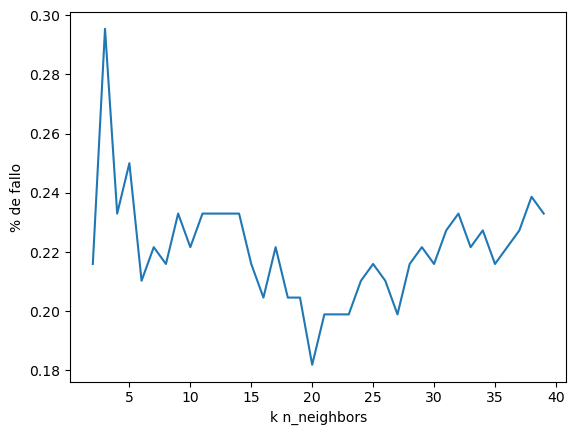

In [25]:
errors = []

for k in range(2,40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    error = 1 - accuracy # aqui decimos que el error es 1 le restamos el accuracy
    errors.append(error)
    
plt.plot(range(2,40), errors)
plt.ylabel('% de fallo')
plt.xlabel('k n_neighbors')

# Vemos que el de 20 vecinos sería el mejor , el ratio de error disminuye
    

In [26]:
# Por el métod del codo, n_neighbords=20 es el mejor, nos mejora los datos KNN =3 y 5

model = KNeighborsClassifier(n_neighbors=20)
calculate_metrics('KNN k= 20', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k= 20,0.818182,0.822222,0.606557,0.698113,0.768496


# Árbol de decisión :

* Criterion:
    * gini (por defecto)
        * Al ser de clasificación usa criterion = "gini"

        * Gini = 0 significa que el nodo es completamente puro, contiene los datos de una clase
        * Gini > 0 indica que hay mezcla de clases, cuánto mayor sea el valor mayor será la impureza
        * Gini es una medida de impureza o mezcla de clases en un nodo de un árbol. Propósito: evaluar qué tan puras son las divisiones en un nodo
    * entropy:
        * Entropy = 0 significa que el nodo es completamente puro, contiene datos de una sola clase
        * Entropy > 0 indica que hay mezcla de clases, cuánto mayor sea el valor mayor será la impureza o la incertidumbre
        * Entropy es una medida de incertidumbre o desorden en un nodo de un árbol
        * Más lento, pero puede ser útil cuando las clases están desbalanceadas
* max_depth
* min_samples_split: Minímo de muestras que debe
* max_features: número máximo de columnas X consideradas



* features_importances_: Importancia de cada columna en la X a la hora de hacer la partición, se calcula la impureza
    * classes_
    * tree_
    * get_depth()

# Cálculo con árbol de decisión

In [27]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8)
calculate_metrics('DT', model)
df_resultados


,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k= 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724


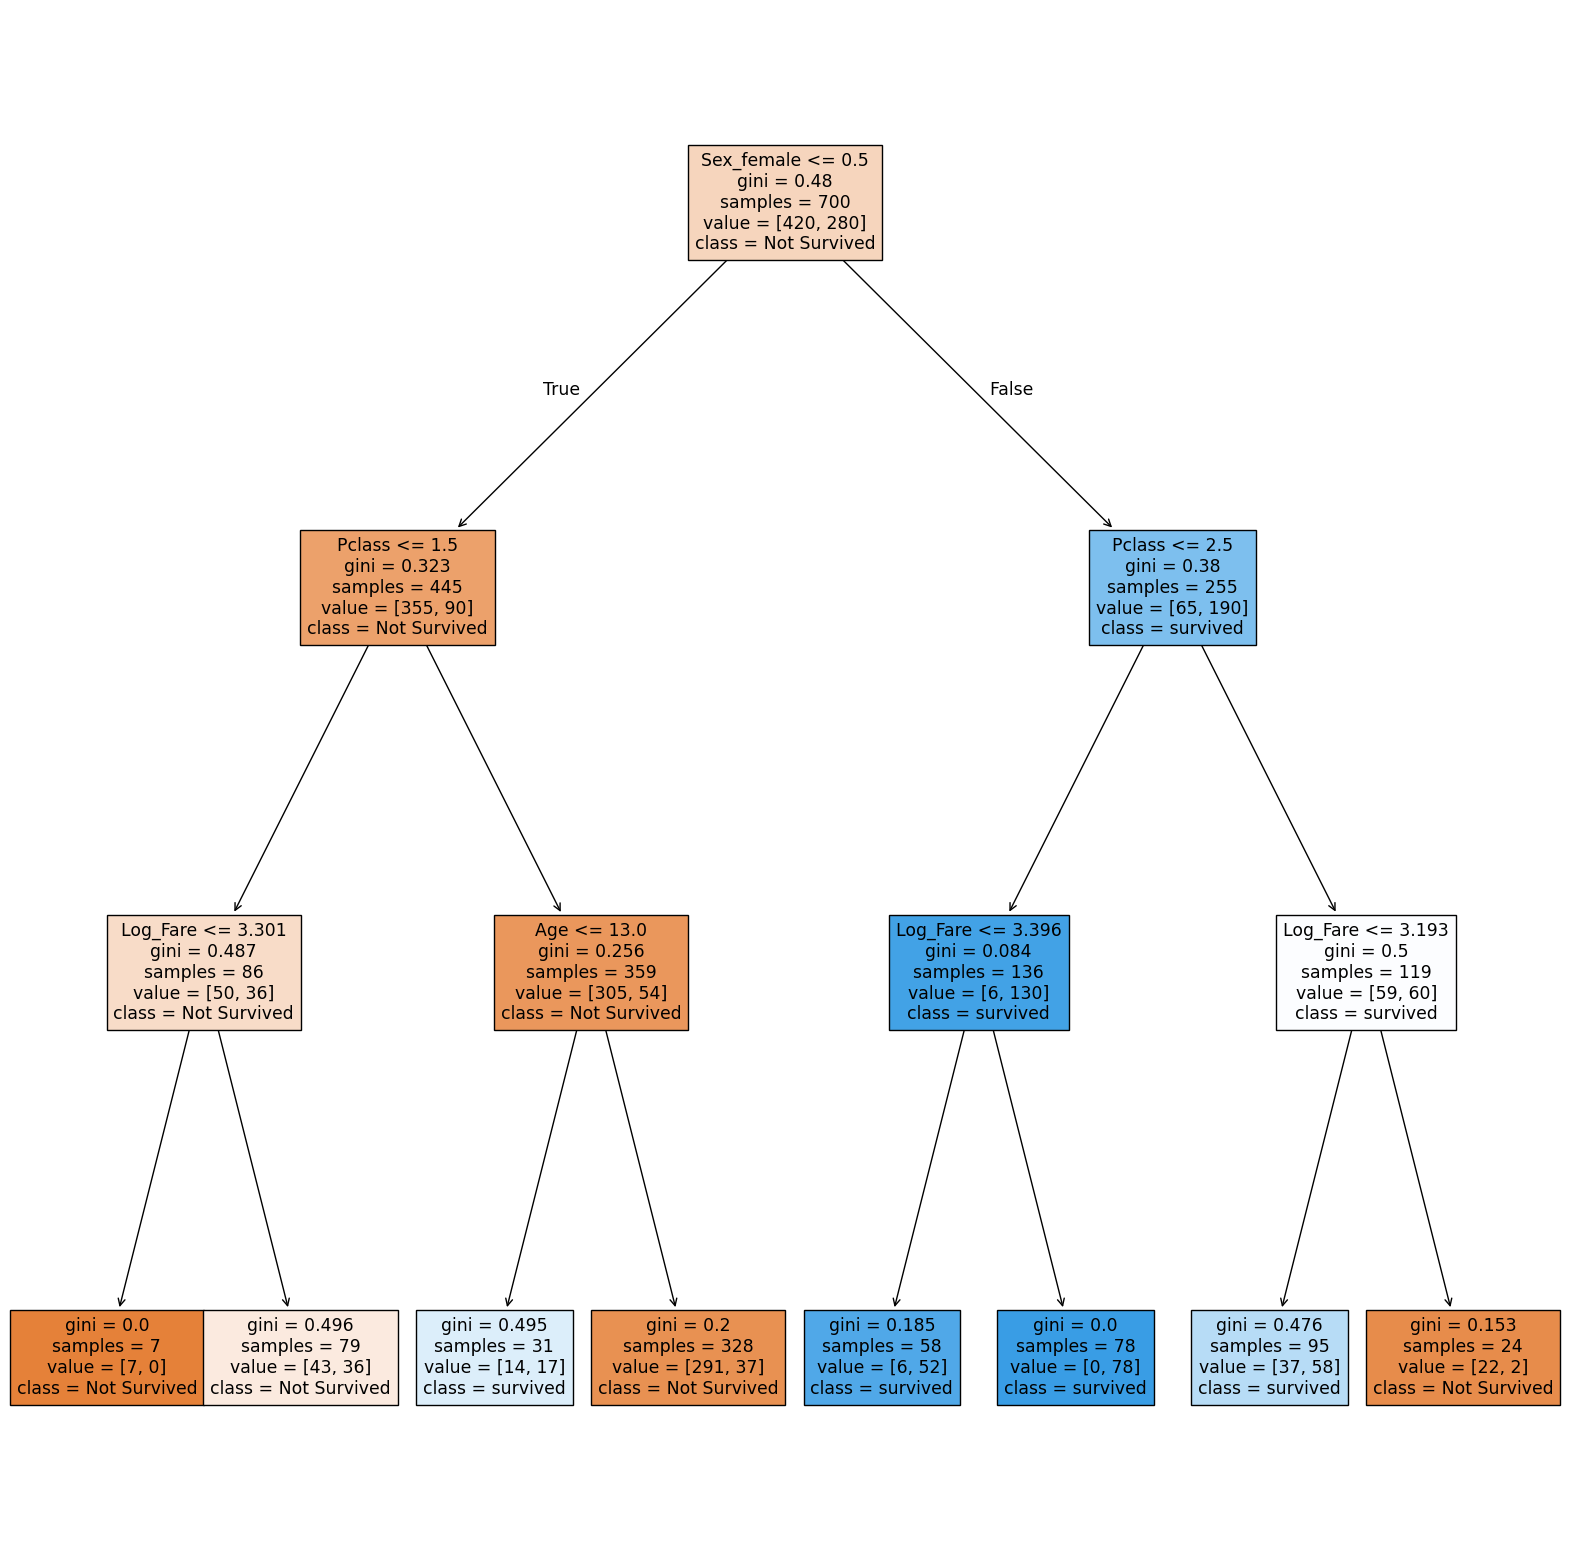

In [28]:
from sklearn.tree import  plot_tree

plt.figure(figsize=(20,20))
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
plot_tree(model, filled=True, class_names=['Not Survived', 'survived'], feature_names=X.columns );

In [29]:
model.feature_importances_

array([0.06880725, 0.22968529, 0.        , 0.        , 0.        ,
       0.61166835, 0.        , 0.0898391 , 0.        , 0.        ,
       0.        ])

In [30]:
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.06880724888664776
Columna: Pclass Importancia: 0.22968529262971887
Columna: Ticket Importancia: 0.0
Columna: Sibsp Importancia: 0.0
Columna: Parch Importancia: 0.0
Columna: Sex_female Importancia: 0.6116683545505839
Columna: Sex_male Importancia: 0.0
Columna: Log_Fare Importancia: 0.08983910393304943
Columna: Embark_Town_Cherbourg Importancia: 0.0
Columna: Embark_Town_Queenstown Importancia: 0.0
Columna: Embark_Town_Southampton Importancia: 0.0


In [31]:
model= DecisionTreeClassifier(max_depth=10)
calculate_metrics('DT depth 10', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k= 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724
5,DT depth 10,0.840909,0.770492,0.770492,0.770492,0.824376


In [32]:
from sklearn.ensemble import RandomForestClassifier


model= RandomForestClassifier(n_estimators=200, min_samples_split=20)
calculate_metrics('RF 200', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k= 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724
5,DT depth 10,0.840909,0.770492,0.770492,0.770492,0.824376
6,RF 200,0.846591,0.803571,0.737705,0.769231,0.821026


## SVC
- * C penalización por errores

- * C grande penaliza fuertemente errores, lo que implicará un margen más pequeño ya que intenta clasificar todos los puntos correctamente

- * C más pequeña tiene un margen muy grande y permite clasificaciones con más errores no es lo más adecuado dar un número muy bajo.
* Por eso cuánto más grande hacia valor 1 posiblemente en SVC nos de mejor resultado

* https://shap.readthedocs.io/en/latest/  
* https://www.scikit-yb.org/en/latest/

In [33]:
from sklearn.svm import SVC

model = SVC()
calculate_metrics('SVC ', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k= 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724
5,DT depth 10,0.840909,0.770492,0.770492,0.770492,0.824376
6,RF 200,0.846591,0.803571,0.737705,0.769231,0.821026
7,SVC,0.795455,0.878788,0.475410,0.617021,0.720314


In [37]:
model = SVC(C=7)
calculate_metrics('SVC 7 ', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RLog,0.829545,0.792453,0.688525,0.736842,0.796436
1,KNN k= 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k= 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k= 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.846591,0.783333,0.770492,0.776860,0.828724
5,DT depth 10,0.840909,0.770492,0.770492,0.770492,0.824376
6,RF 200,0.846591,0.803571,0.737705,0.769231,0.821026
7,SVC,0.795455,0.878788,0.475410,0.617021,0.720314
8,SVC 0.1,0.653409,0.000000,0.000000,0.000000,0.500000
9,SVC 100,0.840909,0.770492,0.770492,0.770492,0.824376


# Exportar el modelo final
- * Viendo los resultados finales el modelo RandomForest es el mejor. Y lo podemos exportar con joblib

In [38]:
from joblib import dump, load

model= RandomForestClassifier(n_estimators=200, min_samples_split=20)
model.fit(X, y)

RandomForestClassifier(min_samples_split=20, n_estimators=200)

In [39]:
# Exportar el modelo

dump(model, 'clasificador_titanic_rf_.joblib')

['clasificador_titanic_rf_.joblib']

In [ ]:
# Importar el modelo
# Este load lo hariamos en otro Notebook, no en este mismo lo realizamos aquí como ejemplo. Ya que lo importaríamos para mejorarlo
model = load('clasificador_titanic_rf_.joblib')

x_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns= X.columns) # estos datos son una de las lineas de una de las personas
model.predict(x_new)



array([0.])

## Librerías para exportar y cargar modelos:

   * joblib: Especifica para serializar grandes objetos Python como modelos ML
   * pickle: Genérico, no solo para modelos ML, también para datos númericos, integrado en Python. Más lento que joblib para arrays grandes de Numpy y no comprime datos por defecto
   * hdf5: es un formato que genera archivos .h5 más ideal para modelos de TensorFlow/Keras para modelos de Deep Learning como redes neuronales